In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def readImagesAndTimes():
    filenames = ["./Exposures/img_0.033.jpg", "./Exposures/img_0.25.jpg", "./Exposures/img_2.5.jpg", "./Exposures/img_15.jpg"]

    #list of exposure times
    times = np.array([1/30, 0.25, 2.5, 15], dtype=np.float32)

    #read images
    images = []
    for file in filenames:
        img = cv.imread(file)
        gray = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        images.append(gray)

    return images, times

In [12]:
images, times = readImagesAndTimes()

In [13]:
#align images
alignMTB = cv.createAlignMTB()
alignMTB.process(images, images)

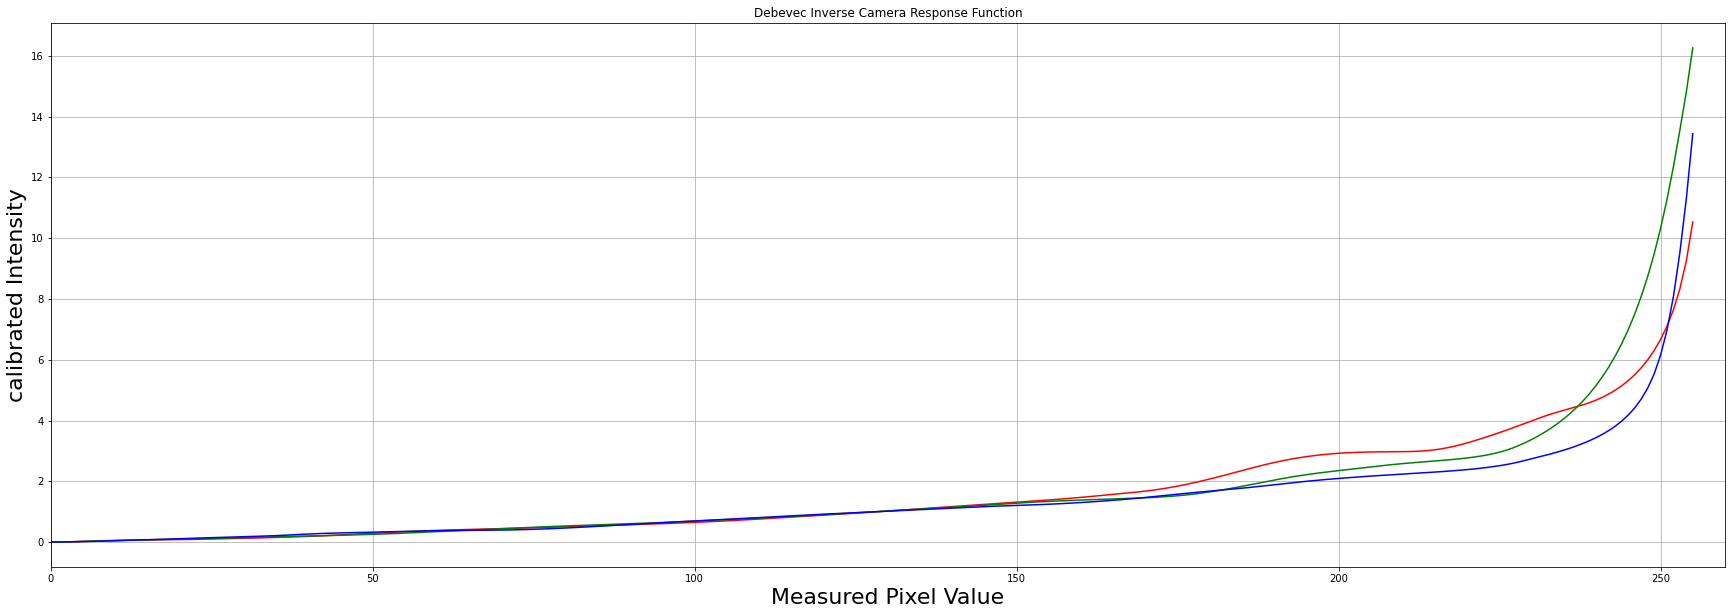

In [16]:
#Estimate camera response function

#find camera response function (CRF)
calibrateDebevec = cv.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

#plot CRF
x = np.arange(256, dtype=np.uint8)
y = np.squeeze(responseDebevec)
ax = plt.figure(figsize=[30, 10])
plt.title('Debevec Inverse Camera Response Function')
plt.xlabel("Measured Pixel Value", fontsize=22)
plt.ylabel("calibrated Intensity", fontsize=22)
plt.xlim([0, 260])
plt.grid()
plt.plot(x, y[:, 0], "r", x, y[:, 1], 'g', x, y[:, 2], 'b')

In [17]:
# Merge Images into as HDR linear Image
mergeDebevec = cv.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)

(-0.5, 2815.5, 2111.5, -0.5)

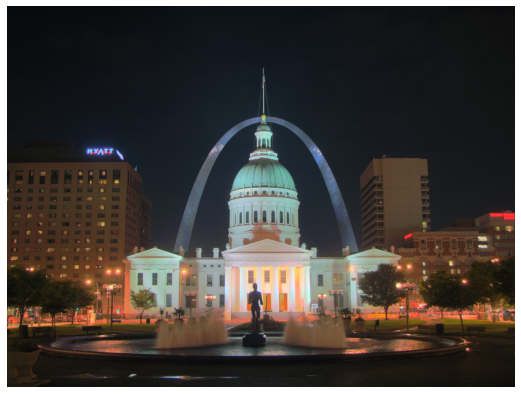

In [21]:
#Tonemapping
#Many Tonemapping algorithms are avaiable in OpenCV. We chose Durand as it has more controls

#Tonemap using Drago's method to obtain 24-bit color image
tonemapDrago = cv.createTonemapDrago(1.0, 0.7)
IdrDrago = tonemapDrago.process(hdrDebevec)
IdrDrago = 3 * IdrDrago
plt.figure(figsize=[15, 7])
plt.imshow(np.clip(IdrDrago, 0, 1))
plt.axis('off')
#cv.imwrite("idr-Drago.jpg", IdrDrago * 255)
#print("saved image")

(-0.5, 2815.5, 2111.5, -0.5)

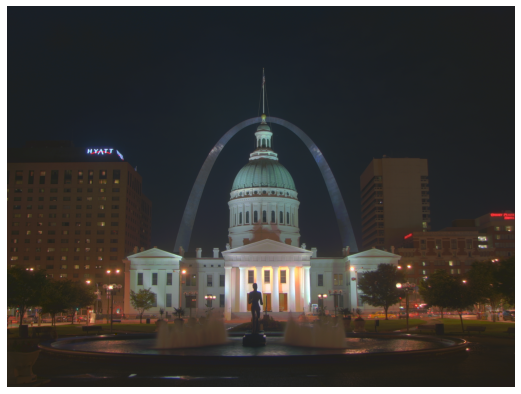

In [22]:
# Tonemap using Mantiuk's method to obtain 24-bit color image
tonemapMantiuk = cv.createTonemapMantiuk(2.2, 0.85, 1.2)
IdrMantiuk = tonemapMantiuk.process(hdrDebevec)
IdrMantiuk = 3 * IdrMantiuk
plt.figure(figsize=[15, 7])
plt.imshow(np.clip(IdrMantiuk, 0, 1))
plt.axis('off')